# TASK 1 - Prediction using Supervised Learning

### Author - Akash Chauhan

**OBJECTIVE**- Predict the percentage of marks of a student based on the number of study hours.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

**READING DATASET**

In [4]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
print("Successful!")

Successful!


In [5]:
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [6]:
data.shape

(25, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11B7BD00>,
      dtype=object)

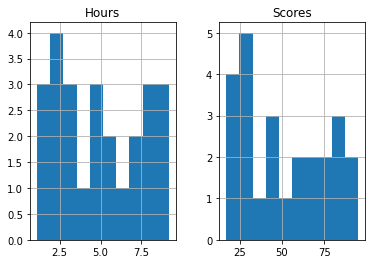

In [8]:
data.hist()

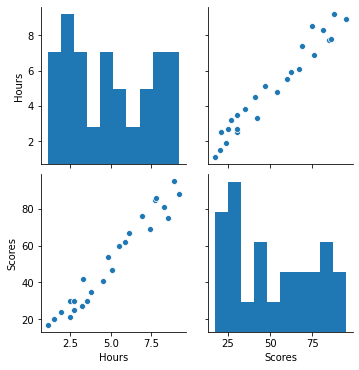

In [9]:
sns.pairplot(data)

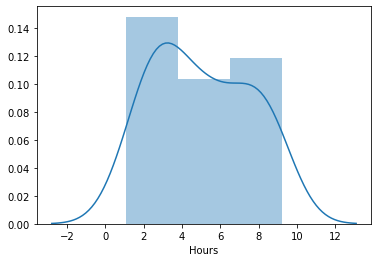

In [10]:
sns.distplot(data['Hours'])

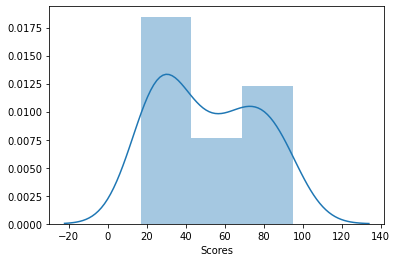

In [13]:
sns.distplot(data['Scores'])

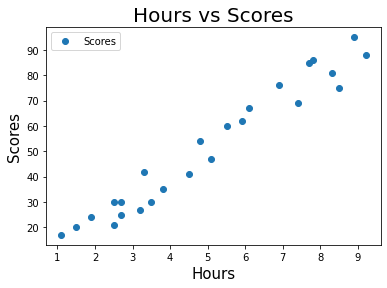

In [21]:
data.plot(x='Hours',y='Scores', style='o')
plt.title('Hours vs Scores', fontsize=20)
plt.xlabel('Hours', fontsize=15)
plt.ylabel('Scores',fontsize=15)
plt.show()

The graph clearly show that there is a linear relation between the two variables used in the analysis.

**PREPARING THE DATA**

In [17]:
x = data.iloc[:,:1].values
y = data.iloc[:,1:2].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

In [19]:
print('Shape of x train and test data', x_train.shape, x_test.shape)
print('Shape of y train and test data', y_train.shape, y_test.shape)

Shape of x train and test data (17, 1) (8, 1)
Shape of y train and test data (17, 1) (8, 1)


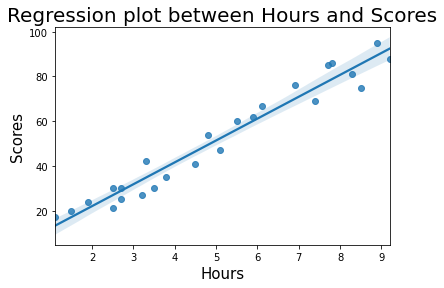

In [23]:
sns.regplot(x = 'Hours', y = 'Scores', data = data)
plt.title('Regression plot between Hours and Scores', fontsize = 20)
plt.xlabel('Hours', fontsize = 15)
plt.ylabel('Scores', fontsize = 15)
plt.show()

**APPLYING LINEAR REGRESSION**

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error

predictR = model.predict(x_train)
print('MeanSquared for train data:', round(mean_squared_error(predictR, y_train), 3))

predictS = model.predict(x_test)
print('MeanSquared for test data:', round(mean_squared_error(predictS, y_test), 3))

MeanSquared for train data: 31.398
MeanSquared for test data: 23.619


**Actual and Predicted values**



In [34]:
pre = pd.Series(predictS.ravel())
y_test = pd.Series(y_test.ravel())
concat = [pre, y_test]

z = pd.concat(concat,axis = 1, keys = ['predict','actual'])
z.head()

,predict,actual
0,83.391686,81
1,27.070549,30
2,27.070549,21
3,69.796929,76
4,60.086388,62


**Plotting graph for actual and predicted values**

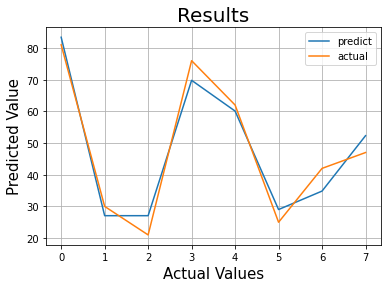

In [38]:
z.plot()
plt.grid()
plt.title('Results', fontsize = 20)
plt.xlabel('Actual Values', fontsize = 15)
plt.ylabel('Predicted Value', fontsize = 15)
plt.show()

**Regression between predicted and actual values**

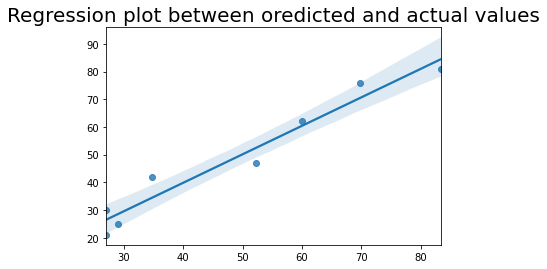

In [39]:
sns.regplot(predictS, y_test)
plt.title('Regression plot between oredicted and actual values', fontsize = 20)
plt.show()

# What will be the predicted scores if a student studies for 9.25 hours per day?

In [40]:
z = model.predict([[9.25]])
print(z)

[[92.61670034]]


## Answer : The predicted score if a student studies for 9.25 hours per day will be 92.6% 